In [1]:
from sklearn.metrics import confusion_matrix, make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import joblib
import shap

import warnings
warnings.filterwarnings('ignore')

In [2]:
clf = joblib.load('random_forest.joblib')

In [3]:
root_directory = '../../../data/train_test_split/'

X_train_transformed = pd.read_csv(root_directory+'x_train_rf.csv')
y_train = pd.read_csv(root_directory+'y_train.csv')['is_drafted']

X_test_transformed = pd.read_csv(root_directory+'x_test_rf.csv')
y_test = pd.read_csv(root_directory+'y_test.csv')['is_drafted']

In [4]:
y_pred = clf.predict(X_test_transformed)

In [5]:
# Failure Analysis 1: 
# clf.classes_
y_pred_prob = clf.predict_proba(X_test_transformed)[:, 1]

In [6]:
# compute SHAP values
explainer = shap.TreeExplainer(clf, X_test_transformed)
sv_test = explainer(X_test_transformed, check_additivity=False)

100%|===================| 11968/11970 [08:43<00:00]        

In [13]:
# Stitch features and prediction together as one big df
df = X_test_transformed.copy()
df['draft_prob'] = y_pred_prob
df['is_drafted'] = y_test

##### Scenario 1: High Propensity player that went undrafted

In [14]:
# Get top undrafted recruit
df_undrafted = df[df['is_drafted'] == 0]
df_undrafted.sort_values(by = 'num__rating', ascending = False).head(1)

,cat__stars_3,cat__stars_4,cat__stars_5,cat__side_of_ball_athlete,cat__side_of_ball_defense,cat__side_of_ball_offense,cat__side_of_ball_special,cat__conference_group_group_5,cat__conference_group_independent,cat__conference_group_power_5,...,num__latitude_school,num__longitude,num__games_played_rolling_2year,num__wins_rolling_2year,num__distance_miles,num__point_diff_rolling_2year,num__post_season_wins_rolling_2year,num__height,draft_prob,is_drafted
519,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.618503,0.499346,0.365302,0.725911,-0.505289,1.082206,0.465464,0.212574,0.957845,0.0


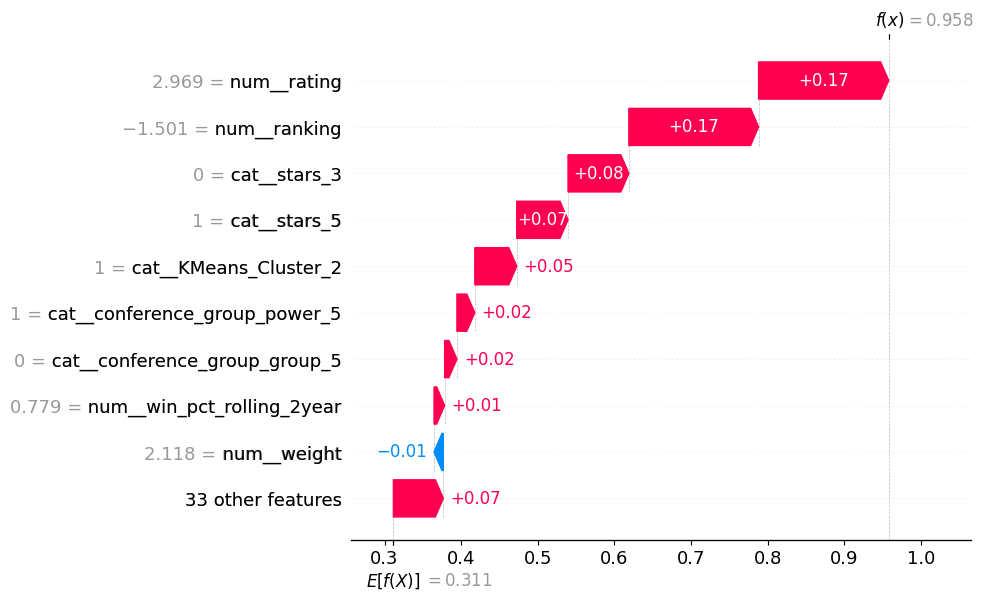

In [15]:
i = 519

shap.plots.waterfall(sv_test[i][:,1], max_display = 10)

In [16]:
root_directory = '../../../data/train_test_split/'

X_test = pd.read_csv(root_directory+'x_test.csv')
X_test.iloc[519]

Unnamed: 0.1                                7700
Unnamed: 0                                  7701
name                              Trent Thompson
rating                                    0.9991
ranking                                      1.0
year                                        2015
position                                      DT
height                                      74.5
weight                                     313.0
latitude                               31.578206
longitude                             -84.155681
hometown_city                             Albany
state_province                                GA
hometown_country                             USA
stars                                          5
committed_to                             Georgia
athlete_id                                   NaN
conference                                   SEC
latitude_school                         33.94982
longitude_school                      -83.373381
wins_rolling_2year  

##### Scenario 2: Highly Rated player that did get drafted that our model down-graded

In [17]:
df['draft_pred'] = y_pred

In [25]:
# Get top undrafted recruit
df_drafted = df[df['is_drafted'] == 1]
df_drafted = df_drafted[df_drafted['draft_pred'] == 0]

df_drafted.sort_values(by = 'num__rating', ascending = False).head(1)

,cat__stars_3,cat__stars_4,cat__stars_5,cat__side_of_ball_athlete,cat__side_of_ball_defense,cat__side_of_ball_offense,cat__side_of_ball_special,cat__conference_group_group_5,cat__conference_group_independent,cat__conference_group_power_5,...,num__longitude,num__games_played_rolling_2year,num__wins_rolling_2year,num__distance_miles,num__point_diff_rolling_2year,num__post_season_wins_rolling_2year,num__height,draft_prob,is_drafted,draft_pred
2576,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.236919,0.365302,0.011862,-0.383821,-0.235583,-0.852799,-0.983419,0.47764,1.0,0.0


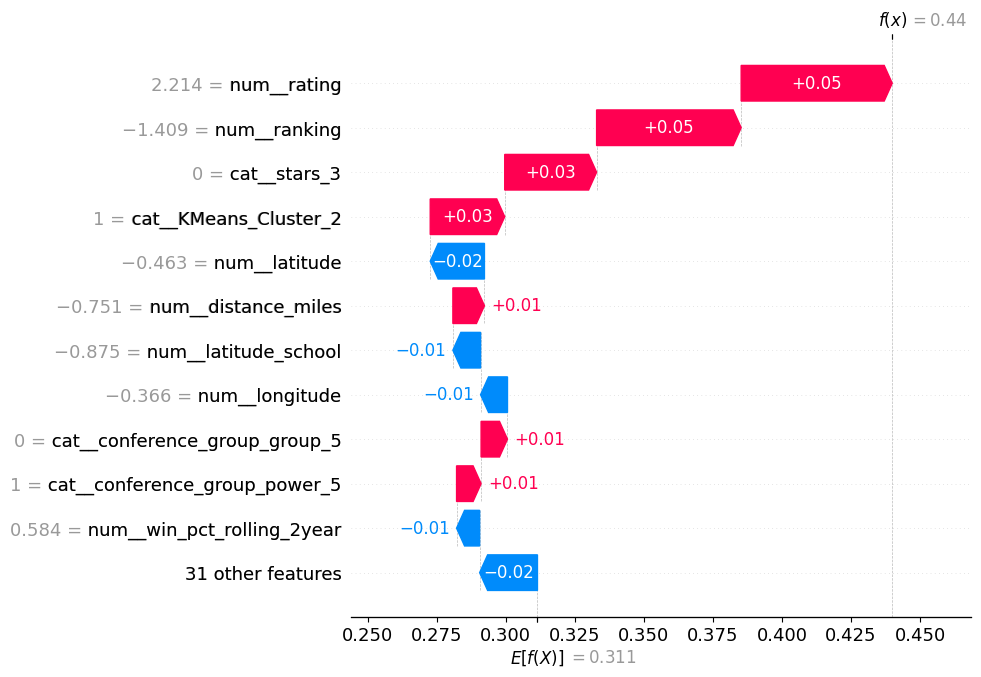

In [19]:
i = 3919

shap.plots.waterfall(sv_test[i][:,1], max_display = 12)

In [20]:
root_directory = '../../../data/train_test_split/'

X_test = pd.read_csv(root_directory+'x_test.csv')
X_test.iloc[3919]

Unnamed: 0.1                             13217
Unnamed: 0                               13218
name                              Jalen Reagor
rating                                  0.9566
ranking                                   96.0
year                                      2017
position                                    WR
height                                    71.0
weight                                   185.0
latitude                             32.394491
longitude                           -96.843936
hometown_city                       Waxahachie
state_province                              TX
hometown_country                           USA
stars                                        4
committed_to                               TCU
athlete_id                           4241802.0
conference                              Big 12
latitude_school                       32.70966
longitude_school                    -97.368083
wins_rolling_2year                        17.0
games_played_

##### Scenario 3: Low Rated Player that got predicted to be drafted, but was actually undrafted

In [21]:
df_undrafted = df[df['is_drafted'] == 0]
df_undrafted_pred_draft = df_undrafted[df_undrafted['draft_pred'] == 1]

df_undrafted_pred_draft.sort_values(by = 'num__rating', ascending = True).head(1)

,cat__stars_3,cat__stars_4,cat__stars_5,cat__side_of_ball_athlete,cat__side_of_ball_defense,cat__side_of_ball_offense,cat__side_of_ball_special,cat__conference_group_group_5,cat__conference_group_independent,cat__conference_group_power_5,...,num__longitude,num__games_played_rolling_2year,num__wins_rolling_2year,num__distance_miles,num__point_diff_rolling_2year,num__post_season_wins_rolling_2year,num__height,draft_prob,is_drafted,draft_pred
979,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.911256,3.40013,2.689545,-0.59451,3.142411,3.10199,1.209235,0.509666,0.0,1.0


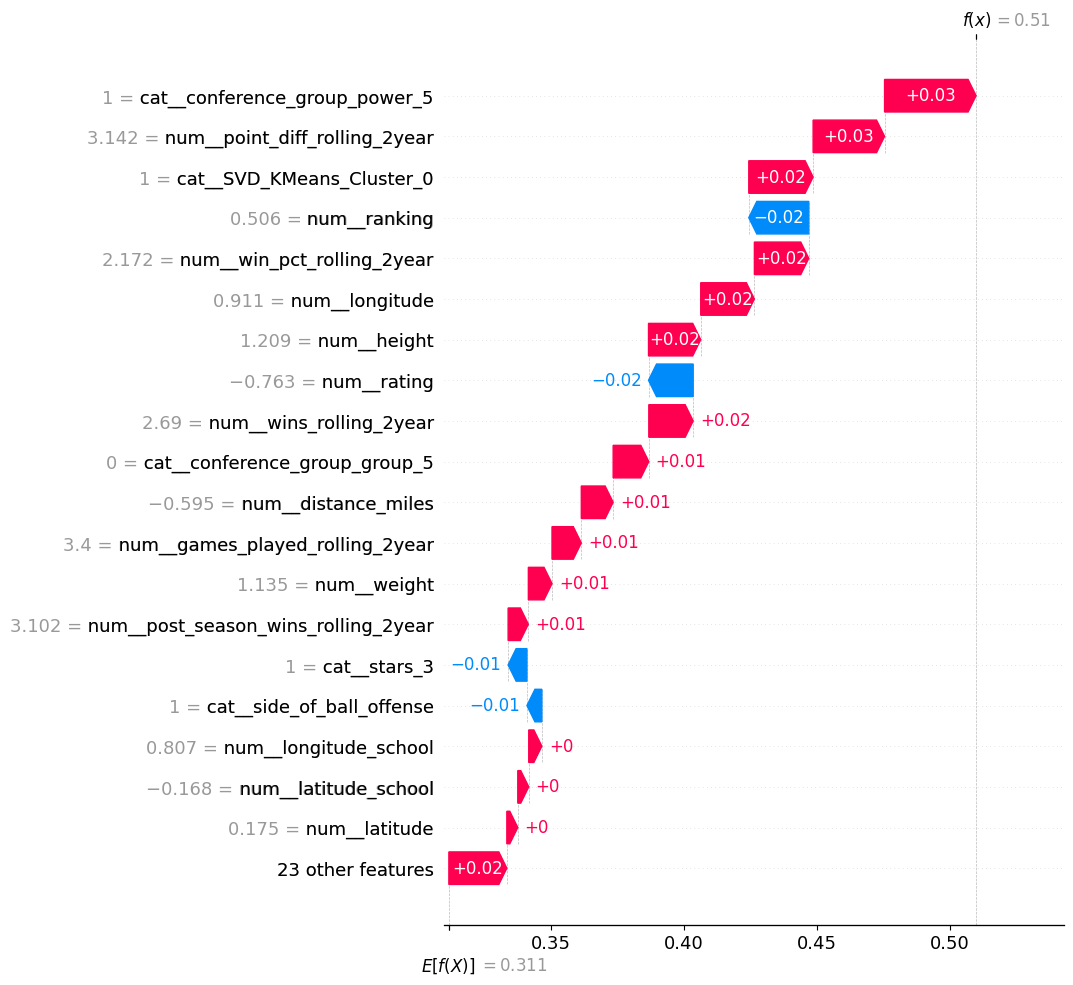

In [22]:
i = 979

shap.plots.waterfall(sv_test[i][:,1], max_display = 20)

In [23]:
root_directory = '../../../data/train_test_split/'

X_test = pd.read_csv(root_directory+'x_test.csv')
X_test.iloc[979]

Unnamed: 0.1                                 4246
Unnamed: 0                                   4246
name                              Cameron Gardner
rating                                      0.789
ranking                                    2078.0
year                                         2013
position                                       OT
height                                       77.0
weight                                      270.0
latitude                                35.780913
longitude                              -78.118429
hometown_city                              Bailey
state_province                                 NC
hometown_country                              USA
stars                                           2
committed_to                          Wake Forest
athlete_id                             -1041694.0
conference                                    ACC
latitude_school                         36.130551
longitude_school                       -80.254585
